In [1]:
import numpy as np
from astropy.table import Table, vstack
import thecannon as tc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#from mpi4py import MPI
import multiprocess as mp
from multiprocess import Pool
import os
import tqdm

from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.table import join

In [56]:
t6 = Table.read("http://cdn.gea.esac.esa.int/Gaia/gdr3/Spectroscopy/xp_continuous_mean_spectrum/XpContinuousMeanSpectrum_000000-003111.csv.gz")


IORegistryError: Format could not be identified based on the file name or contents, please provide a 'format' argument.
The available formats are:
           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
                  ascii.cds  Yes    No            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
              ascii.daophot  Yes    No            No           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes            No           
 ascii.fixed_width_two_line  Yes   Yes            No           
                 ascii.html  Yes   Yes           Yes           
                 ascii.ipac  Yes   Yes            No           
                ascii.latex  Yes   Yes           Yes           
                  ascii.mrt  Yes   Yes            No           
            ascii.no_header  Yes   Yes            No           
                  ascii.qdp  Yes   Yes           Yes           
                  ascii.rdb  Yes   Yes           Yes           
                  ascii.rst  Yes   Yes            No           
           ascii.sextractor  Yes    No            No           
                  ascii.tab  Yes   Yes            No           
                       asdf  Yes   Yes           Yes           
                       fits  Yes   Yes           Yes           
                       hdf5  Yes   Yes           Yes           
                 pandas.csv  Yes   Yes            No           
                 pandas.fwf  Yes    No            No           
                pandas.html  Yes   Yes            No           
                pandas.json  Yes   Yes            No           
                    parquet  Yes   Yes           Yes           
                    votable  Yes   Yes           Yes           
                     aastex  Yes   Yes            No        Yes
                        cds  Yes    No            No        Yes
                        csv  Yes   Yes            No        Yes
                    daophot  Yes    No            No        Yes
                       html  Yes   Yes            No        Yes
                       ipac  Yes   Yes            No        Yes
                      latex  Yes   Yes            No        Yes
                        mrt  Yes   Yes            No        Yes
                        rdb  Yes   Yes            No        Yes

## Read in data
Start off just with APOGEE x DR3 Data

Load in labels:

In [5]:
t3 = Table.read("apogee_w2m_clean_small.fits", format='fits')

In [15]:
t3['source_id_me'] = t3['source_id']

In [47]:
import
t4 = Table.read('Box/Gaia_XP/*')

FileNotFoundError: [Errno 2] No such file or directory: 'Box/Gaia_XP/*'

In [18]:
t_apogee = Table.read("apogee_w2m_clean.fits", format='fits')
t_apogee['source_id_me'] = t_apogee['source_id']

In [19]:
Gaia.login(user='cmanea', password='BB8meetspepper.')

Gaia.upload_table(upload_resource=t_apogee['source_id_me', 'APOGEE_ID'], table_name='apogee_ids_clean_2')

table_name = 'apogee_ids_clean_2'

INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
Sending pytable.
Uploaded table 'apogee_ids_clean_2'.


Read in Gaia BP RP coeffs, errs, truncation recommendations, and basis functions

In [55]:
query = 'select t.*, t2.* from gaiadr3.xp_continuous_mean_spectrum as t inner join ' + 'apogee_ids_clean_2' +' as t2 on t.source_id = t2.source_id_me where t.bp_n_measurements>0 and t.rp_n_measurements>0 '

job = Gaia.launch_job_async(query, dump_to_file=True, output_format='votable')

gaia_bprp_spectra = job.get_results()

500 Error 500:
null


HTTPError: Error 500:
null

In [23]:
#Gaia.upload_table(upload_resource=gaia_bprp_spectra['source_id', 'APOGEE_ID'], table_name='bp_ids')

table_name2 = 'user_cmanea.bp_ids'

query = 'select t.*, t2.* from gaiadr3.astrophysical_parameters as t inner join ' + 'user_cmanea.apogee_ids_clean_2' +' as t2 on t.source_id = t2.source_id_me'

job2 = Gaia.launch_job_async(query, dump_to_file=True, output_format='votable')

gaia_bprp_reportedparams = job2.get_results()

In [27]:
#Table(gaia_bprp_reportedparams).write('apogee_gaia_cross.fits', format='fits')
t_a = join(t_apogee, gaia_bprp_reportedparams, 'source_id')

In [49]:
t_a_filled = t_a.filled
#t_a_filled.write('apogee_gaia_cross.fits', format='fits', overwrite='True')
#t_a.write('apogee_gaia_cross.dat', format='ascii.ecsv')
t_a

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,"FPARAM_GRID [21,9]",CHI2_GRID [21],FPARAM [9],"FPARAM_COV [9,9]",ASPCAP_CHI2,PARAM [9],"PARAM_COV [9,9]",PARAMFLAG [9],ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM [27],FELEM_ERR [27],X_H [27],X_H_ERR [27],X_M [27],X_M_ERR [27],ELEM_CHI2 [27],ELEMFRAC [27],ELEMFLAG [27],EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC [27],X_M_SPEC [27],TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK [100],2MASS,RAJ2000,DEJ2000,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,angDist,JNAME,ra_x,dec_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,W1mag,W2mag,W3mag,W4mag,Jmag_x,Hmag_x,Kmag_x,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag_x,e_Hmag_x,e_Kmag_x,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass,angDist_x,source_id,source_id_me_1,solution_id,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,classprob_dsc_combmod_whitedwarf,classprob_dsc_combmod_binarystar,classprob_dsc_specmod_quasar,classprob_dsc_specmod_galaxy,classprob_dsc_specmod_star,classprob_dsc_specmod_whitedwarf,classprob_dsc_specmod_binarystar,classprob_dsc_allosmod_quasar,classprob_dsc_allosmod_galaxy,classprob_dsc_allosmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,abp_gspphot,abp_gspphot_lower,abp_gspphot_upper,arp_gspphot,arp_gspphot_lower,arp_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,mg_gspphot,mg_gspphot_lower,mg_gspphot_upper,radius_gspphot,radius_gspphot_lower,radius_gspphot_upper,logposterior_gspphot,mcmcaccept_gspphot,libname_gspphot,teff_gspspec,teff_gspspec_lower,teff_gspspec_upper,logg_gspspec,logg_gspspec_lower,logg_gspspec_upper,mh_gspspec,mh_gspspec_lower,

In [42]:
t_a = t_a[(t_a['teff_gspphot']>-1000) & (t_a['logg_gspphot']>-1000) & (t_a['mh_gspphot']>-1000) & (t_a['ag_gspphot']>-1000)]
gaia_teffs = t_a['teff_gspphot']
gaia_loggs = t_a['logg_gspphot']
gaia_mhs = t_a['mh_gspphot']
gaia_ags = t_a['ag_gspphot']

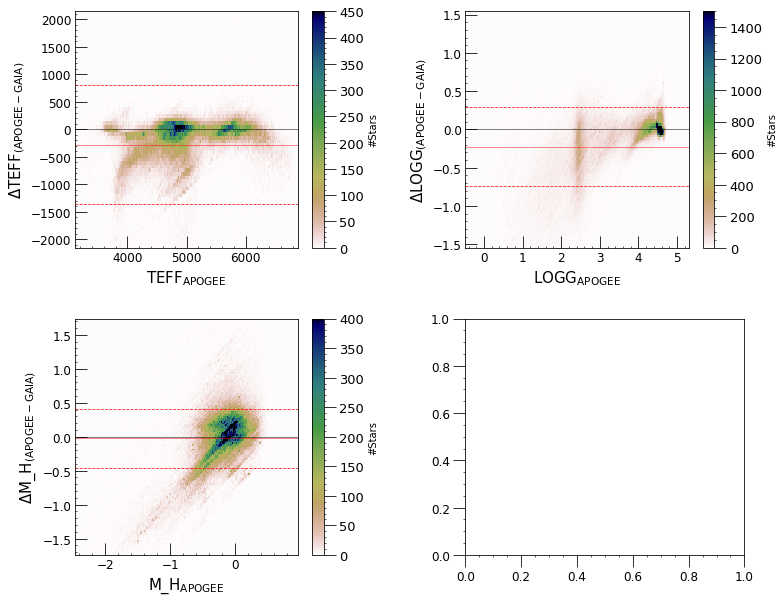

In [43]:
import matplotlib
fig, axs = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["xtick.minor.visible"] =  True

    
unit = ['K', 'dex', 'dex', '']
g_param = ['teff_gspphot', 'logg_gspphot', 'mh_gspphot', 'ag_gspphot']

scale = [2,3,4,2]
bins = [600, 300, 300, 300]
vmax = [450, 1500, 400, 1500]
for i, param in enumerate(['TEFF', 'LOGG', 'M_H']):
    ax = np.ravel(axs)[i]
    h = ax.hist2d(t_a[param],t_a[param] - t_a[g_param[i]], bins=bins[i],  cmap='gist_earth_r', vmin=0, vmax=vmax[i])
    ax.axhline(y=0, c='k', alpha=.99, lw=.5)
    bias = np.round(np.mean(t_a[param] - t_a[g_param[i]]), 3)
    rms = np.round(np.std(t_a[param] - t_a[g_param[i]]), 3)
    ax.axhline(y=bias, c='r', alpha=.9, lw=.5)
    ax.axhline(y=bias+rms, c='r', alpha=.9, lw=.8, ls='--')
    ax.axhline(y=bias-rms, c='r', alpha=.9, lw=.8, ls='--')
#     offset = (np.max(t_test_subset[param]) - np.min(t_test_subset[param]))/8
#     ax.text(offset+np.min(t_test_subset[param]), np.max(test_labels[:,i] - t_test_subset[param])-rms, "bias={a} {b}".format(a=bias, b=unit[i]), fontsize=15)
#     ax.text(offset+np.min(t_test_subset[param]), np.max(test_labels[:,i] - t_test_subset[param])-(2*rms), "rms={a} {b}".format(a=rms, b=unit[i]), fontsize=15)
#     #ax.text(0.1, 0.8, "rms={}".format(rms))
    cbar = fig.colorbar(h[3], ax=ax, label='#Stars')
    cbar.ax.tick_params(labelsize=13) 
    #ax.set_title(param)
    ax.set_ylim(-scale[i]*rms, scale[i]*rms)
    ax.set_xlabel(param+r"$\rm _{{}APOGEE{}}$", fontsize=15)
    ax.set_ylabel(r"$\rm \Delta$"+param+r"$\rm _{(APOGEE - GAIA)}$", fontsize=15)
    ax.tick_params(axis="both", which='both', direction="in")
plt.savefig("Gaia_Figs/apogee_vs_gaia.pdf")
plt.show()
plt.close()

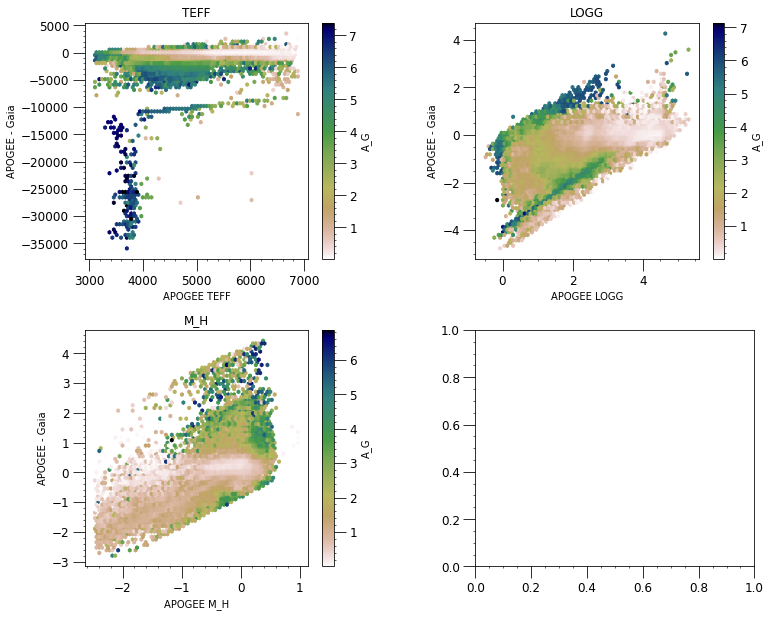

In [54]:
fig, axs = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i, param in enumerate(['TEFF', 'LOGG', 'M_H']):
    ax = np.ravel(axs)[i]
    h = ax.hexbin(t_a[param],t_a[param] - t_a[g_param[i]], gridsize=70, C=t_a['ag_gspphot'], cmap='gist_earth_r')
    fig.colorbar(h, ax=ax, label='A_G')
    ax.set_title(param)
    ax.set_xlabel("APOGEE {}".format(param))
    ax.set_ylabel("APOGEE - Gaia")
plt.savefig("Gaia_Figs/firsttry_colorAg.pdf")
plt.show()

In [ ]:
df = gaia_bprp_spectra.to_pandas()

bps = np.concatenate(df['bp_coefficients']).reshape(len(gaia_bprp_spectra), len(df['bp_coefficients'][0]))
bp_errs = np.concatenate(df['bp_coefficient_errors']).reshape(len(gaia_bprp_spectra), len(df['bp_coefficients'][0]))
bp_rel_bases = df['bp_n_relevant_bases']
max_bp_bases = np.nanmax(bp_rel_bases)
bp_basis_func = df['rp_basis_function_id']

rps = np.concatenate(df['rp_coefficients']).reshape(len(gaia_bprp_spectra), len(df['bp_coefficients'][0]))
rp_errs = np.concatenate(df['rp_coefficient_errors']).reshape(len(gaia_bprp_spectra), len(df['bp_coefficients'][0]))
rp_rel_bases = df['rp_n_relevant_bases']
max_rp_bases = np.nanmax(rp_rel_bases)
rp_basis_func = df['rp_basis_function_id']

Truncate to relevant bases and combine

In [ ]:
bps_trunc = bps[:, :max_bp_bases]
bp_errs_trunc = bp_errs[:, :max_bp_bases]

rps_trunc = rps[:, :max_rp_bases]
rp_errs_trunc = rp_errs[:, :max_rp_bases]

bprps = np.zeros((len(bps_trunc), max_bp_bases+max_rp_bases))
bprp_errs = np.zeros((len(bps_trunc), max_bp_bases+max_rp_bases))

bprps[:,:max_bp_bases] = bps_trunc
bprp_errs[:,:max_bp_bases] = bp_errs_trunc

bprps[:,max_bp_bases:] = rps_trunc
bprp_errs[:,max_bp_bases:] = rp_errs_trunc

xs = bprps
xerrs = bprp_errs

Tack WISE, 2MASS photometry onto end of coefficient arrays

In [ ]:
#add photometry
phots_matrix = np.zeros((len(xs), 7))
photerrs_matrix = np.zeros((len(xs), 7))
phots_matrix[:, 0] = np.array(t_apogee_all['GAIAEDR3_PHOT_BP_MEAN_MAG']).astype(float)
phots_matrix[:, 1] = np.array(t_apogee_all['GAIAEDR3_PHOT_BP_MEAN_MAG']).astype(float)
phots_matrix[:, 2] = np.array(t_apogee_all['Jmag']).astype(float)
phots_matrix[:, 3] = np.array(t_apogee_all['Hmag']).astype(float)
phots_matrix[:, 4] = np.array(t_apogee_all['Kmag']).astype(float)
phots_matrix[:, 5] = np.array(t_apogee_all['W1mag']).astype(float)
phots_matrix[:, 6] = np.array(t_apogee_all['W2mag']).astype(float)
# phots_matrix[:, 7] = np.array(t_apogee['W3']).astype(float)
# phots_matrix[:, 8] = np.array(t_apogee['W4']).astype(float)

photerrs_matrix[:, 0] = np.array(t_apogee_all['e_Jmag']).astype(float)
photerrs_matrix[:, 1] = np.array(t_apogee_all['e_Jmag']).astype(float)
photerrs_matrix[:, 2] = np.array(t_apogee_all['e_Jmag']).astype(float)
photerrs_matrix[:, 3] = np.array(t_apogee_all['e_Hmag']).astype(float)
photerrs_matrix[:, 4] = np.array(t_apogee_all['e_Kmag']).astype(float)
photerrs_matrix[:, 5] = np.array(t_apogee_all['e_W1mag']).astype(float)
photerrs_matrix[:, 6] = np.array(t_apogee_all['e_W2mag']).astype(float)
# photerrs_matrix[:, 7] = np.array(t_apogee['W3_err']).astype(float)
# photerrs_matrix[:, 8] = np.array(t_apogee['W4_err']).astype(float)


xs_with_phot = np.zeros((xs.shape[0],xs.shape[1]+7))
xerrs_with_phot = np.zeros((xs.shape[0],xs.shape[1]+7))

xs_with_phot[:,:xs.shape[1]] = xs
xerrs_with_phot[:,:xs.shape[1]] = xerrs

xs_with_phot[:,xs.shape[1]:] = phots_matrix
xerrs_with_phot[:,xs.shape[1]:] = photerrs_matrix
phots_matrix.shape, xs_with_phot.shape

In [53]:
# import time
# size = len(t) #adjust if you only want to play with subset of data
# start_time = time.time()
# p = Pool(os.cpu_count()-2)
# results = np.array(p.map(read_in_data, range(size)))
# xs = np.array(results)[:,0,:]
# xerrs = np.array(results)[:,1,:]
# print(time.time() - start_time, ' s')
# print(size)

#read in gaia bp rp coeffs
#t_all = Table.read(gaia_spectra_file, format='fits')

Create an evenly sampled APOGEE Training Set

[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01]
-0.4828255 [-0.48282549 -0.1764543   0.12991689  0.43628809  0.74265928  1.04903047
  1.35540166  1.66177285  1.96814404  2.27451523  2.58088643  2.88725762
  3.19362881  3.5       ]
(array([  1770,   2684,   3824,   5486,   6507,   9802,  30515,  83790,
       131930, 162939, 114298,  39406]), array([-2.0000000e+00, -1.8000000e+00, -1.6000000e+00, -1.4000000e+00,
       -1.2000000e+00, -1.0000000e+00, -8.0000000e-01, -6.0000000e-01,
       -4.0000000e-01, -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,
        4.0000000e-01]))


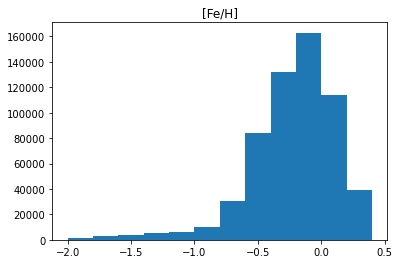

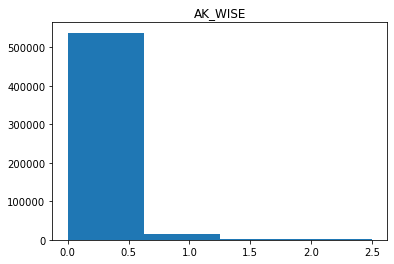

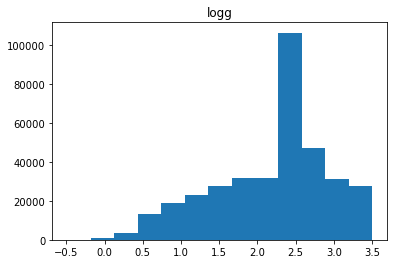

In [67]:
t_params = gaia_bprp_spectra #t_apogee_all

feh_bins = np.arange(-2, 0.5, .2)
extinction_bins = np.linspace(0, 2.5, 5)
logg_bins = np.linspace(np.min(t_params['LOGG']), 3.5, 14)

plt.figure()
plt.hist(t_params['M_H'], bins=feh_bins)
plt.title('[Fe/H]')
plt.show()
plt.close()

plt.figure()
plt.hist(t_params['AK_WISE'], bins=extinction_bins)
plt.title('AK_WISE')
plt.show()
plt.close()

plt.figure()
plt.hist(t_params['LOGG'], bins=logg_bins)
plt.title('logg')
plt.show()
plt.close()

In [68]:
c = 0
e = 0
for i in range(len(feh_bins)-1):
    for j in range(len(extinction_bins)-1):
        for k in range(len(logg_bins)-1):
            c+=1
            #print(feh_bins[i], '-', feh_bins[i+1], extinction_bins[j], '-', extinction_bins[j+1], logg_bins[k], '-', logg_bins[k+1])
            if i == len(feh_bins)-1:
                if j == len(extinction_bins)-1:
                    if k == len(parallax_bins)-1:
                        good = np.where((t_params['GAIAEDR3_PHOT_G_MEAN_MAG']<17.6) & (t_params['M_H'] > feh_bins[i]) & (t_params['AK_WISE'] > extinction_bins[j])  & (t_params['LOGG'] > logg_bins[k]))
                    else:
                        good = np.where((t_params['GAIAEDR3_PHOT_G_MEAN_MAG']<17.6) & (t_params['M_H'] > feh_bins[i]) & (t_params['AK_WISE'] > extinction_bins[j])  & (t_params['LOGG'] > logg_bins[k]) & (t_params['LOGG'] <= logg_bins[k+1]))
                else:
                    good = np.where((t_params['GAIAEDR3_PHOT_G_MEAN_MAG']<17.6) & (t_params['M_H'] > feh_bins[i]) & (t_params['AK_WISE'] > extinction_bins[j]) & (t_params['AK_WISE'] <= extinction_bins[j+1]) & (t_params['LOGG'] > logg_bins[k]) & (t_params['LOGG'] <= logg_bins[k+1]))
            else:
                good = np.where((t_params['GAIAEDR3_PHOT_G_MEAN_MAG']<17.6) & (t_params['M_H'] <= feh_bins[i+1]) & (t_params['M_H'] > feh_bins[i]) & (t_params['AK_WISE'] > extinction_bins[j]) & (t_params['AK_WISE'] <= extinction_bins[j+1]) & (t_params['LOGG'] > logg_bins[k]) & (t_params['LOGG'] <= logg_bins[k+1]))
            if good[0].size <2:
                if (i == 0) & (j == 0):
                    training_index = [good[0][:1]]
                e+=1
#                 print('Empty Voxel')
#                 print('FeH: ', feh_bins[i], '-', feh_bins[i+1], '\n Extinction: ', extinction_bins[j], '-', extinction_bins[j+1], '\n Logg: ', logg_bins[k], '-', logg_bins[k+1])
#                 print(good[0], ' \n\n\n')
                training_index = np.append(training_index,good[0][:1])
            else:
                if (i == 0) & (j == 0):
                    training_index = [good[0][:1]]
                else:
                    training_index = np.append(training_index,good[0][:1])
print('Number of Voxels: ',c, 'Number empty: ', e)
t_apogee_cleantrain = t_params[training_index]
xs_with_phot_cleantrain = xs_with_phot[training_index]
xerrs_with_phot_cleantrain = xerrs_with_phot[training_index]
print(t_cleantrain_params)



Number of Voxels:  624 Number empty:  287
                FILE                    APOGEE_ID      ... r_2mass angDist_x
                                                       ...           arcsec 
----------------------------------- ------------------ ... ------- ---------
asStar-dr17-2M06014757-5951510.fits 2M06014757-5951510 ...   0.428  0.427861
apStar-dr17-2M19135986-0543519.fits 2M19135986-0543519 ...   0.134  0.133924
asStar-dr17-2M16562942-3949345.fits 2M16562942-3949345 ...   0.096  0.095919
apStar-dr17-2M13385588+1842417.fits 2M13385588+1842417 ...   0.197  0.197151
apStar-dr17-2M22043983-0711337.fits 2M22043983-0711337 ...   0.089  0.089713
asStar-dr17-2M04572884-7027294.fits 2M04572884-7027294 ...   0.118  0.118061
                                ...                ... ...     ...       ...
asStar-dr17-2M18260007-1145026.fits 2M18260007-1145026 ...   0.379  0.379415
asStar-dr17-2M18200091-1554284.fits 2M18200091-1554284 ...    0.17  0.170349
apStar-dr17-2M18362063-0741208.fit

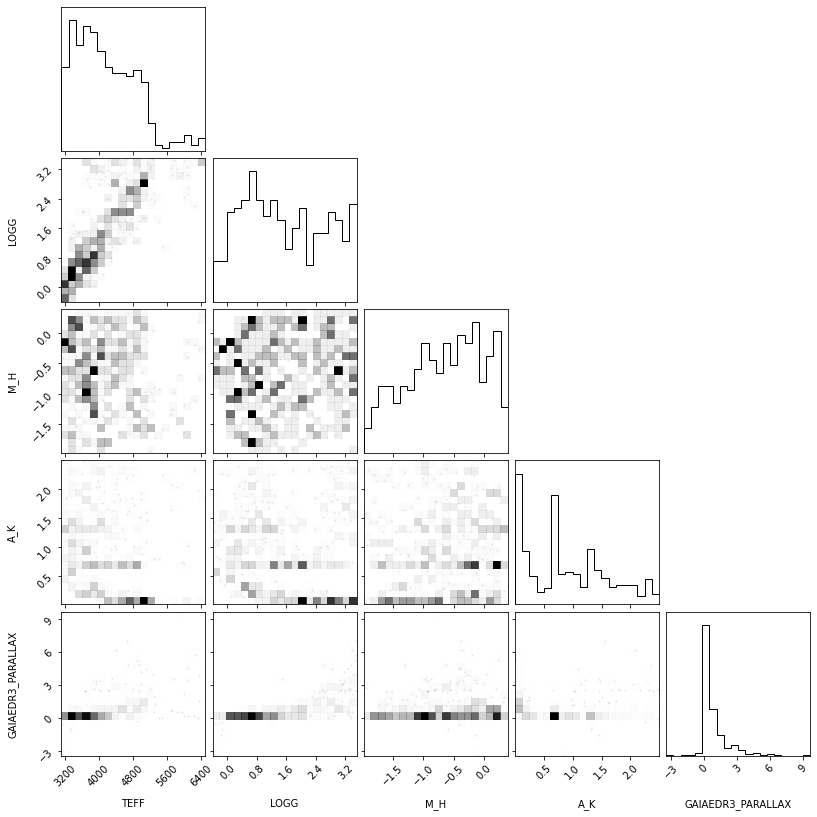

In [69]:
import corner


# ndim, nsamples = 2, 10000
# np.random.seed(42)
# samples = np.array(list(np.array(t_cleantrain['Teff', 'logg', 'A_v', 'feh'])))
# figure = corner.corner(samples)

df = t_apogee_cleantrain['TEFF', 'LOGG', 'M_H', 'AK_WISE', 'GAIAEDR3_PARALLAX'].to_pandas()
figure = corner.corner(df, plot_contours=False, labels=['TEFF', 'LOGG', 'M_H', 'A_K', 'GAIAEDR3_PARALLAX'], fontsize=12)
plt.savefig('apogee_trainingset_clean_corner.pdf')

Choose subset of data for training and testing (uncomment relevant cell)

In [153]:
# # **Giants**

# subset = np.where((t['Teff'] < 5500) & (t['logg'] < 3) & (t['A_v'] < 1) & (t['A_v'] > 0))
# t_subset = t[subset]
# xs_subset = xs_with_phot[subset]
# xerrs_subset = xerrs_with_phot[subset]

(3318, 904)


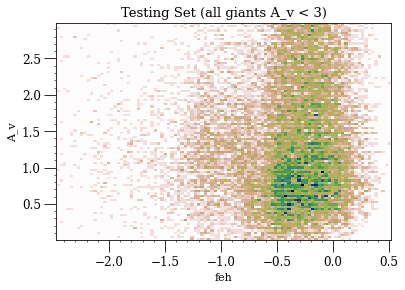

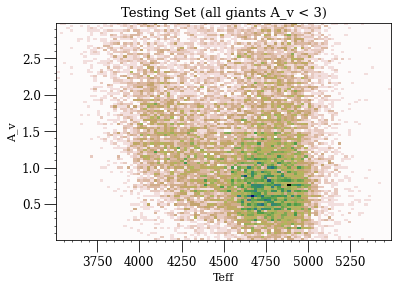

In [333]:
# # **Giants and Less Restrictive A_v

#training subsets
train_subset = training_index
t_train_subset = t_apogee_cleantrain
xs_train_subset = xs_with_phot_cleantrain
xerrs_train_subset = xerrs_with_phot_cleantrain

#testing subsets
test_subset = np.where((t_params['TEFF'] < 5500) & (t_params['LOGG'] < 3))
t_test_subset = t_params[test_subset]
xs_test_subset = xs_with_phot[test_subset]
xerrs_test_subset = xerrs_with_phot[test_subset]

#remove bad spectra
bad = np.where(np.isnan(np.mean(xs_train_subset,axis=1)))
xs_train_subset = np.delete(xs_train_subset, bad, axis=0)
xerrs_train_subset = np.delete(xerrs_train_subset, bad, axis=0)
t_train_subset.remove_rows(bad[0])

bad = np.where(np.isnan(np.mean(xs_test_subset,axis=1)))
xs_test_subset = np.delete(xs_test_subset, bad, axis=0)
xerrs_test_subset = np.delete(xerrs_test_subset, bad, axis=0)
t_test_subset.remove_rows(bad[0])

plt.figure()
plt.hist2d(t_test_subset['M_H'], t_test_subset['AK_WISE'], bins=100, cmap='gist_earth_r')
plt.xlabel('feh')
plt.ylabel('A_v')
plt.title('Testing Set (all giants A_v < 3)')
plt.show()

plt.figure()
plt.hist2d(t_test_subset['TEFF'], t_test_subset['AK_WISE'], bins=100, cmap='gist_earth_r')
plt.xlabel('Teff')
plt.ylabel('A_v')
plt.title('Testing Set (all giants A_v < 3)')
plt.show()

In [141]:
# # **DWARFS**

# subset = np.where((t['Teff'] < 6500) & (t['Teff'] > 4500) & (t['logg'] > 4) & (t['A_v'] < 1) & (t['A_v'] > 0))
# t_subset = t[subset]
# xs_subset = xs_with_phot[subset]
# xerrs_subset = xerrs_with_phot[subset]

In [ ]:
# **Dwarfs+Giants**
# subset = np.where((t['Teff'] < 6500) & (t['A_v'] < 10) & (t['A_v'] > 0))
# t_subset = t[subset]
# xs_subset = xs_with_phot[subset]
# xerrs_subset = xerrs_with_phot[subset]

Normalize data according to desired scheme (max, min-max, deviation from mean, etc.)

In [595]:
#remove magnitude information by dividing by max coefficient
#furthermore, scale photometry by bp mag
#do train and test sets separately
max_spectrum = np.nanmax(xs_train_subset, axis=1)
xs_train_subset_maxnorm = xs_train_subset
max_grid = np.repeat(max_spectrum, xs_train_subset.shape[1]).reshape(xs_train_subset.shape[0], xs_train_subset.shape[1])
bp_mags = np.repeat(xs_train_subset[:,-7], 7).reshape(xs_train_subset.shape[0], 7)
xs_train_subset_maxnorm[:,:-7] = xs_train_subset[:,:-7]/max_grid[:,:-7]
xs_train_subset_maxnorm[:,-7:] = xs_train_subset[:,-7:]/bp_mags

max_spectrum = np.nanmax(xs_test_subset, axis=1)
xs_test_subset_maxnorm = xs_test_subset
max_grid = np.repeat(max_spectrum, xs_test_subset.shape[1]).reshape(xs_test_subset.shape[0], xs_test_subset.shape[1])
bps = np.repeat(xs_test_subset[:,-7], 7).reshape(xs_test_subset.shape[0], 7)
xs_test_subset_maxnorm[:,:-7] = xs_test_subset[:,:-7]/max_grid[:,:-7]
xs_test_subset_maxnorm[:,-7:] = xs_test_subset[:,-7:]/bp_mags

#scale each spectrum by mean spetrum (train and test spex scaled by mean of training spectra)
mean_spectrum = np.nanmean(xs_train_subset_maxnorm, axis=0)
mean_grid = np.repeat(mean_spectrum, xs_train_subset.shape[0]).reshape(xs_train_subset.shape[1], xs_train_subset.shape[0]).T

xs_train_subset_maxmeannorm = xs_train_subset_maxnorm/mean_grid
xs_test_subset_maxmeannorm = xs_test_subset_maxnorm/mean_grid

xs_train_subset_maxmeannorm

(2304, 904) (2304, 904)


Separate training and testing sets, reassign NaN and inf values:

In [307]:
#making training and testing sets
# train_inds = np.random.choice(range(len(t)),int(.6*len(t)),replace=False)
# test_inds = np.array(list(set(range(len(t)))- set(train_inds)),dtype='int')

train_xs = xs_train_subset
train_errs = xerrs_train_subset

test_xs = xs_test_subset
test_errs = xerrs_test_subset

# bad = np.where(np.isnan(train_xs))
# train_xs[bad] = 0.0000001
# bad = np.where(np.isnan(train_errs))
# train_errs[bad] = 0.0000001
bad = np.where(train_xs==np.inf)
train_xs[bad] = 1e6
bad = np.where(train_errs==np.inf)
train_errs[bad] = 1e6
bad = np.where(np.isnan(train_errs))
train_errs[bad] = 1e-6


bad = np.where(test_xs==np.inf)
test_xs[bad] = 1e6
bad = np.where(test_errs==np.inf)
test_errs[bad] = 1e6

train_t = t_train_subset
test_t = t_test_subset

print(len(train_t), len(test_t))

np.where(np.isnan(train_errs))

2304 20940


(array([], dtype=int64), array([], dtype=int64))

Specify vectorizer, set up and train the model:

In [308]:
# # Specify the vectorizer.
# vectorizer = tc.vectorizer.PolynomialVectorizer(("Teff", "logg", "feh", "A_v"), 2)
# # set up model
# model = tc.CannonModel(train_t, train_xs, train_errs,
#                        vectorizer=vectorizer, dispersion=wf)


vectorizer = tc.vectorizer.PolynomialVectorizer(("TEFF", "LOGG", "M_H", "AK_WISE"), 2)

model = tc.CannonModel(train_t, train_xs, train_errs, vectorizer=vectorizer)
# # No regularization.
model.regularization = 0

# Train the model!
model.train()


2022-06-09 18:08:02,728 [INFO] Training 4-label CannonModel with 2304 stars and 904 pixels/star
stty: 2022-06-09 18:08:02,753 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[=====                                                                                               ]   5% (48/904)                          

stdin isn't a terminal


[====================================================================================================] 100% (2s)                               


(array([[ 1.34977330e-04,  2.44766309e-04,  1.99589045e-04, ...,
         -9.35786183e-05,  2.30838431e-04,  4.70489248e-04],
        [ 2.63864389e-04,  4.75848395e-04,  3.87553498e-04, ...,
         -1.81700860e-04,  4.46154114e-04,  9.16042853e-04],
        [ 4.86533136e-04,  8.72378115e-04,  7.09687057e-04, ...,
         -3.32873524e-04,  8.13061474e-04,  1.68168201e-03],
        ...,
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0

Test the model:

In [309]:
#infer for train
test_labels, cov, metadata = model.test(test_xs, test_errs)


#fig_comparison = tc.plot.one_to_one(model, test_labels, latex_label_names=[r"T_{\rm eff}",r"\log{g}",r"[{\rm Fe}/{\rm H}]",r"{\rm A_V}"])
#fig_comparison.savefig(fig_path+"one-to-one.png", dpi=300)

stty: stdin isn't a terminal
2022-06-09 18:08:04,698 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2022-06-09 18:08:04,700 [INFO] Running test step on 20940 spectra


[====================================================================================================] 100% (180s)                                 


Plot difference between true and inferred values:

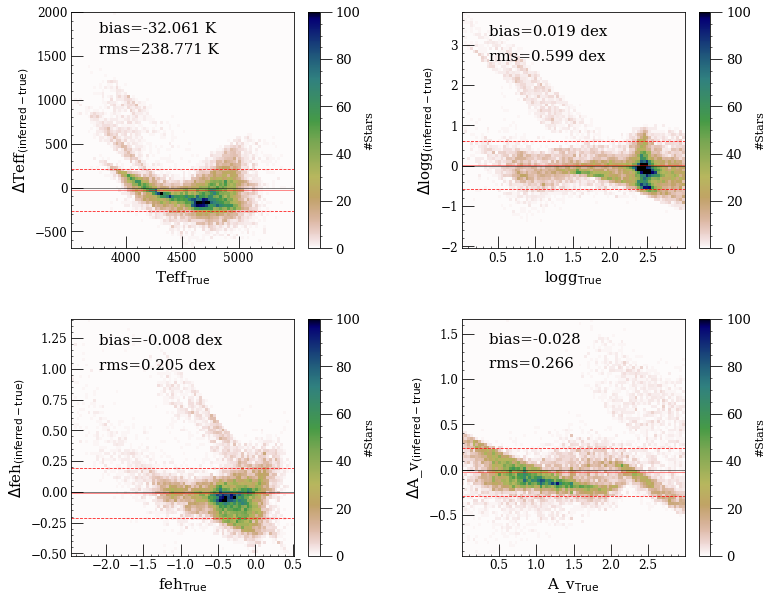

In [312]:
%matplotlib inline
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 11}

import matplotlib
fig, axs = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
plt.rc('font', **font)
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["xtick.minor.visible"] =  True

    
unit = ['K', 'dex', 'dex', '']
for i, param in enumerate(['TEFF', 'LOGG', 'M_H', 'AK_WISE']):
    ax = np.ravel(axs)[i]
    h = ax.hist2d(t_test_subset[param],test_labels[:,i] - t_test_subset[param], bins=80,  cmap='gist_earth_r', vmin=0, vmax=100)
    ax.axhline(y=0, c='k', alpha=.99, lw=.5)
    bias = np.round(np.mean(test_labels[:,i] - t_test_subset[param]), 3)
    rms = np.round(np.std(test_labels[:,i] - t_test_subset[param]), 3)
    ax.axhline(y=bias, c='r', alpha=.9, lw=.5)
    ax.axhline(y=bias+rms, c='r', alpha=.9, lw=.8, ls='--')
    ax.axhline(y=bias-rms, c='r', alpha=.9, lw=.8, ls='--')
    offset = (np.max(t_test_subset[param]) - np.min(t_test_subset[param]))/8
    ax.text(offset+np.min(t_test_subset[param]), np.max(test_labels[:,i] - t_test_subset[param])-rms, "bias={a} {b}".format(a=bias, b=unit[i]), fontsize=15)
    ax.text(offset+np.min(t_test_subset[param]), np.max(test_labels[:,i] - t_test_subset[param])-(2*rms), "rms={a} {b}".format(a=rms, b=unit[i]), fontsize=15)
    #ax.text(0.1, 0.8, "rms={}".format(rms))
    cbar = fig.colorbar(h[3], ax=ax, label='#Stars')
    cbar.ax.tick_params(labelsize=13) 
    #ax.set_title(param)
    ax.set_xlabel(param+r"$\rm _{{}True{}}$", fontsize=15)
    ax.set_ylabel(r"$\rm \Delta$"+param+r"$\rm _{(inferred - true)}$", fontsize=15)
    ax.tick_params(axis="both", which='both', direction="in")
plt.savefig("Gaia_Figs/firsttry.pdf")



# Ignore below

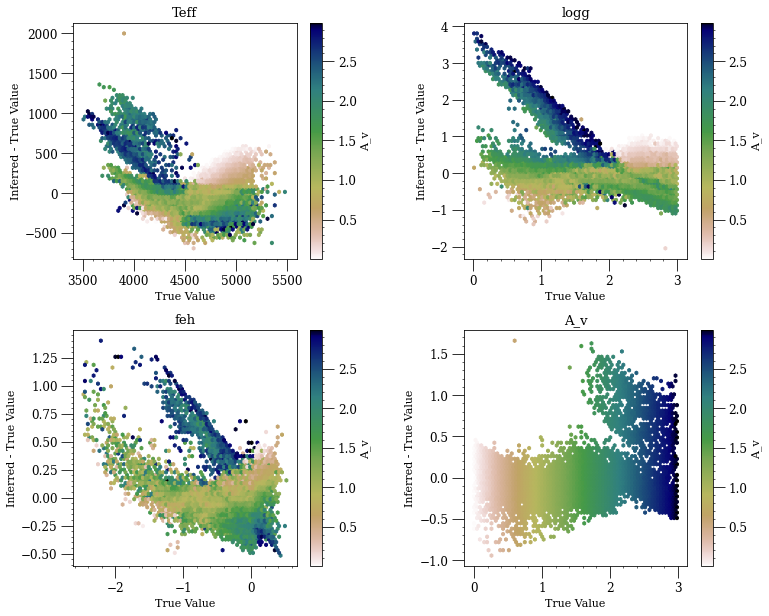

In [315]:
fig, axs = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i, param in enumerate(['TEFF', 'LOGG', 'M_H', 'AK_WISE']):
    ax = np.ravel(axs)[i]
    h = ax.hexbin(t_test_subset[param],test_labels[:,i] - t_test_subset[param], gridsize=70, C=t_test_subset['A_v'], cmap='gist_earth_r')
    fig.colorbar(h, ax=ax, label='A_v')
    ax.set_title(param)
    ax.set_xlabel("True Value")
    ax.set_ylabel("Inferred - True Value")
plt.savefig("Gaia_Figs/firsttry_colorAv.pdf")

In [ ]:
fig, axs = p.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i, param in enumerate(['Teff', 'logg', 'feh', 'A_v']):
    ax = np.ravel(axs)[i]
    h = ax.hexbin(t_subset[param][test_inds],test_labels[:,i] - t_subset[param][test_inds], gridsize=40, C=t_subset['Teff'][test_inds])
    fig.colorbar(h, ax=ax, label='Teff')
    ax.set_title(param)
    ax.set_xlabel("True Value")
    ax.set_ylabel("Inferred - True Value")
p.savefig("Diagnostic_Figs/inferred_vs_true_giants_colorTeff.pdf")

Histograms of inferred and true values

In [ ]:
fig, axs = p.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, param in enumerate(['Teff', 'logg', 'feh', 'A_v']):
    ax = np.ravel(axs)[i]
    ax.hist(test_labels[:,i], alpha=.5, label='Inferred', bins=np.linspace(np.min(test_labels[:,i]), np.max(test_labels[:,i]), 10))
    ax.hist(t_subset[param][test_inds], alpha=.5, label='True', bins=np.linspace(np.min(test_labels[:,i]), np.max(test_labels[:,i]), 10))
    ax.set_title(param)
    ax.legend()

In [ ]:
print(np.mean(test_labels[:,0]))
print(np.mean(np.abs(test_labels[:,0]-t_subset['Teff'][test_inds])))
print(np.mean(np.abs(test_labels[:,1]-t_subset['logg'][test_inds])))
print(np.mean(t_subset['Teff'][test_inds]))

In [ ]:
print(np.min(t_subset['Teff'][test_inds]), np.max(t_subset['Teff'][test_inds]))
print(np.min(t_subset['Teff'][train_inds]), np.max(t_subset['Teff'][train_inds]))

In [ ]:
t = Table.read(table_path+'synth_apogee_0.fits')
t = t[t['synth']]
t_apogee = Table.read(table_path+'apogee_good_0.fits')
t_apogee_reordered = t_apogee

goods = []
for i in range(len(t)):
    if i%1000 == 0:
        print(i)
    spot = np.where((np.round(t_apogee['TEFF'], 2) == np.round(t['Teff'][i], 2)) & (np.round(t_apogee['LOGG'], 2) == np.round(t['logg'][i], 2)) & (np.round(t_apogee['M_H'], 3) == np.round(t['feh'][i], 3)) & (np.round(t_apogee['SNR'], 3) == np.round(t['SNR'][i], 3)))
    if len(spot[0]) == 1:
        spot = spot[0][0]
        #print(t['Teff'][i], t_apogee['TEFF'][spot])
        t_apogee_reordered[i] = t_apogee[spot]
        #print(t_apogee_reordered['TEFF'][i])
        goods.append(i)

print(len(goods))

t[goods].write(table_path+'synth_apogee_good.fits', format='fits', overwrite=True)
t_apogee_reordered[goods].write(table_path+'apogee_info_good.fits', format='fits', overwrite=True)
#np.round(t['Teff'][5], 2), np.round(t_apogee['TEFF'][5], 2)

In [ ]:
t_apogee = Table.read(table_path+'apogee_info_good.fits')
t_apogee_2mass_wise = Table.read(table_path+'apogee_2mass_wise.fits')

t_apogee['J'], t_apogee['H'], t_apogee['K'] = np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee))
t_apogee['W1'], t_apogee['W2'], t_apogee['W3'], t_apogee['W4'] = np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee))

t_apogee['J_err'], t_apogee['H_err'], t_apogee['K_err'] = np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee))
t_apogee['W1_err'], t_apogee['W2_err'], t_apogee['W3_err'], t_apogee['W4_err'] = np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee)), np.repeat(1e-6, len(t_apogee))


#t_apogee_2mass_wise['W3mag'][(t_apogee_2mass_wise['W3mag'] == np.empty).mask]

for i, ID in enumerate(t_apogee['APOGEE_ID'][:]):
    if i % 1000 == 0:
        print(np.round(100 * ind/len(t_apogee), 2))
    if ID in t_apogee_2mass_wise['APOGEE_ID']:
        spot = np.where(t_apogee_2mass_wise['APOGEE_ID'] == ID)
        if (spot[0].size>0):
            if (spot[0].size==1):
                if (t_apogee_2mass_wise['W3mag'][spot] != np.empty) & (t_apogee_2mass_wise['W4mag'][spot] != np.empty):
                    t_apogee['J'][i] = t_apogee_2mass_wise['Jmag'][spot]
                    t_apogee['H'][i] = t_apogee_2mass_wise['Hmag'][spot]
                    t_apogee['K'][i] = t_apogee_2mass_wise['Kmag'][spot]
                    t_apogee['W1'][i] = t_apogee_2mass_wise['W1mag'][spot]
                    t_apogee['W2'][i] = t_apogee_2mass_wise['W2mag'][spot]
                    t_apogee['W3'][i] = t_apogee_2mass_wise['W3mag'][spot]
                    t_apogee['W4'][i] = t_apogee_2mass_wise['W4mag'][spot]
                    t_apogee['J_err'][i] = t_apogee_2mass_wise['e_Jmag'][spot]
                    t_apogee['H_err'][i] = t_apogee_2mass_wise['e_Hmag'][spot]
                    t_apogee['K_err'][i] = t_apogee_2mass_wise['e_Kmag'][spot]
                    t_apogee['W1_err'][i] = t_apogee_2mass_wise['e_W1mag'][spot]
                    t_apogee['W2_err'][i] = t_apogee_2mass_wise['e_W2mag'][spot]
                    t_apogee['W3_err'][i] = t_apogee_2mass_wise['e_W3mag'][spot]
                    t_apogee['W4_err'][i] = t_apogee_2mass_wise['e_W4mag'][spot]
            else:
                spot = spot[0][0]
                t_apogee['J'][i] = t_apogee_2mass_wise['Jmag'][spot]
                t_apogee['H'][i] = t_apogee_2mass_wise['Hmag'][spot]
                t_apogee['K'][i] = t_apogee_2mass_wise['Kmag'][spot]
                t_apogee['W1'][i] = t_apogee_2mass_wise['W1mag'][spot]
                t_apogee['W2'][i] = t_apogee_2mass_wise['W2mag'][spot]
                t_apogee['W3'][i] = t_apogee_2mass_wise['W3mag'][spot]
                t_apogee['W4'][i] = t_apogee_2mass_wise['W4mag'][spot]
                t_apogee['J_err'][i] = t_apogee_2mass_wise['e_Jmag'][spot]
                t_apogee['H_err'][i] = t_apogee_2mass_wise['e_Hmag'][spot]
                t_apogee['K_err'][i] = t_apogee_2mass_wise['e_Kmag'][spot]
                t_apogee['W1_err'][i] = t_apogee_2mass_wise['e_W1mag'][spot]
                t_apogee['W2_err'][i] = t_apogee_2mass_wise['e_W2mag'][spot]
                t_apogee['W3_err'][i] = t_apogee_2mass_wise['e_W3mag'][spot]
                t_apogee['W4_err'][i] = t_apogee_2mass_wise['e_W4mag'][spot]

t_apogee

In [ ]:
t_apogee.write('apogee_info_good_2mass_wise.fits', format='fits', overwrite=True)

In [ ]:
# def func1():
#     print('func1: starting')
#     for i in xrange(10000000): pass
#     print('func1: finishing')

# def func2():
#     print('func2: starting')
#     for i in xrange(10000000): pass
#     print('func2: finishing')

# p1 = Process(target=func1)
# p1.start()
# p2 = Process(target=func2)
# p2.start()
# p1.join()
# p2.join()

In [ ]:
t_apogee = Table.read(table_path+'apogee_good_0.fits', format='fits')
t_wise2mass = Table.read(table_path+'apogee_good_0_wise2mass.fits', format='fits')['APOGEE_ID','W1mag', 'e_W1mag', 'W2mag', 'e_W2mag','W3mag', 'e_W3mag', 'W4mag', 'e_W4mag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag']
t_apogee = t_apogee[t1['synth']]

#add 2mass wise data
t_wise2mass = Table.read(table_path+'apogee_good_0_wise2mass.fits', format='fits')['APOGEE_ID','W1mag', 'e_W1mag', 'W2mag', 'e_W2mag','W3mag', 'e_W3mag', 'W4mag', 'e_W4mag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag']
t_apogee['W1'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W2'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W3'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W4'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W1_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W2_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W3_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['W4_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['J'] = np.repeat(np.nan, len(t_apogee))
t_apogee['H'] = np.repeat(np.nan, len(t_apogee))
t_apogee['K'] = np.repeat(np.nan, len(t_apogee))
t_apogee['J_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['H_err'] = np.repeat(np.nan, len(t_apogee))
t_apogee['K_err'] = np.repeat(np.nan, len(t_apogee))

for i in range(len(t_apogee)):
    if i%1000 == 0:
        print(100*i/len(t_apogee))
    if t_apogee['APOGEE_ID'][i] in t_wise2mass['APOGEE_ID']:
        spot = np.where((t_wise2mass['APOGEE_ID'] == t_apogee['APOGEE_ID'][i]))[0][0]
        t_apogee['W1'][i] = t_wise2mass['W1mag'][spot]
        t_apogee['W1_err'][i] = t_wise2mass['e_W1mag'][spot]
        t_apogee['W2'][i] = t_wise2mass['W2mag'][spot]
        t_apogee['W2_err'][i] = t_wise2mass['e_W2mag'][spot]
        t_apogee['W3'][i] = t_wise2mass['W3mag'][spot]
        t_apogee['W3_err'][i] = t_wise2mass['e_W3mag'][spot]
        t_apogee['W4'][i] = t_wise2mass['W4mag'][spot]
        t_apogee['W4_err'][i] = t_wise2mass['e_W4mag'][spot]
        t_apogee['J'][i] = t_wise2mass['Jmag'][spot]
        t_apogee['J_err'][i] = t_wise2mass['e_Jmag'][spot]
        t_apogee['H'][i] = t_wise2mass['Hmag'][spot]
        t_apogee['H_err'][i] = t_wise2mass['e_Hmag'][spot]
        t_apogee['K'][i] = t_wise2mass['Kmag'][spot]
        t_apogee['K_err'][i] = t_wise2mass['e_Kmag'][spot]
        
#fake bp rp errors
t_apogee['BP'] = t_apogee['GAIAEDR3_PHOT_BP_MEAN_MAG']
t_apogee['RP'] = t_apogee['GAIAEDR3_PHOT_RP_MEAN_MAG']
t_apogee['BP_err'] = t_apogee['J_err']
t_apogee['RP_err'] = t_apogee['J_err']

t_apogee.write('apogee_good_0_w2m.fits', format='fits', overwrite=True)

In [ ]:
for i in range(10):
    
    if i == 0:
        goods1 = Table.read('apogee_good_{}.fits'.format(i), format='fits')
        t1 = Table.read(table_path+'synth_apogee_{}.fits'.format(i), format='fits')
    if i != 0:
        goods2 = Table.read('apogee_good_{}.fits'.format(i), format='fits')
        t2 = Table.read(table_path+'synth_apogee_{}.fits'.format(i), format='fits')
        t1 = vstack([t1, t2])
        goods1 = vstack([goods1, goods2])
print(len(t1), len(goods1))
t = t1[t1['synth']]
t_apogee = goods1[t1['synth']]

t_apogee.write("apogee_good_all.fits")
t.write("synth_apogee_all.fits")